# Video Game (Electronic Arts) Global Sales Analysis

## Main Goal
- The goal of this project is to show Exploratory Data Analysis and Predictive Analysis of [Electronic Arts](https://en.wikipedia.org/wiki/Electronic_Arts) Global Sales

## Data Description

Dataset can be downloaded from [Video Game Sales](https://www.kaggle.com/gregorut/videogamesales)

This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of [vgchartz.com](https://www.vgchartz.com/)

The dataset contains 11 columns. The names and data types are as follows:

* **Rank** - Ranking of overall sales, integer
* **Name** - The games name, object
* **Platform** - Platform of the games release (i.e. PC,PS4, Nintendo, etc.), object
* **Year** - Year of the game's release, float
* **Genre** - Genre of the game ,object
* **Publisher** - Publisher of the game
* **NA_Sales** - Sales in North America (in millions)
* **EU_Sales** - Sales in Europe (in millions)
* **JP_Sales** - Sales in Japan (in millions)
* **Other_Sales** - Sales in the rest of the world (in millions)
* **Global_Sales** - Total worldwide sales.

## Data Processing & Wrangling

In [1]:
 # Load important packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict

In [2]:
# Load Dataset
df = pd.read_csv("vgsales.csv", encoding="ISO-8859-1", low_memory=False)
df.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [3]:
df.shape

(16598, 11)

### Handling missing values 

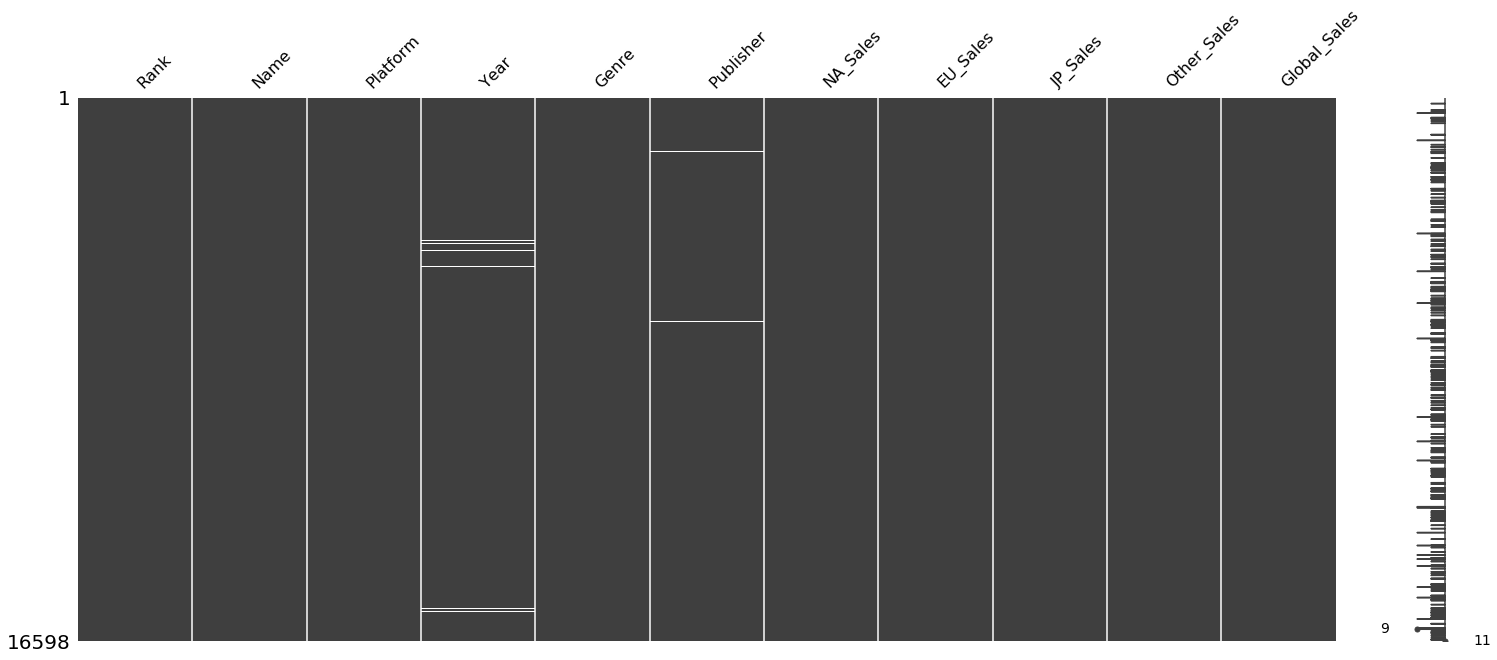

In [4]:
msno.matrix(df)

In [5]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Rank
False    16598
Name: Rank, dtype: int64

Name
False    16598
Name: Name, dtype: int64

Platform
False    16598
Name: Platform, dtype: int64

Year
False    16327
True       271
Name: Year, dtype: int64

Genre
False    16598
Name: Genre, dtype: int64

Publisher
False    16540
True        58
Name: Publisher, dtype: int64

NA_Sales
False    16598
Name: NA_Sales, dtype: int64

EU_Sales
False    16598
Name: EU_Sales, dtype: int64

JP_Sales
False    16598
Name: JP_Sales, dtype: int64

Other_Sales
False    16598
Name: Other_Sales, dtype: int64

Global_Sales
False    16598
Name: Global_Sales, dtype: int64



- Missing values are in **Publisher** and **Year** columns. Let's drop those values.

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [8]:
df.shape

(16291, 11)

In [9]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [10]:
# Coverting "Year" column to datetime 
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [11]:
df['Year'].dtypes

dtype('<M8[ns]')

In [12]:
df.head()

Rank                      Name Platform       Year         Genre Publisher  \
0     1                Wii Sports      Wii 2006-01-01        Sports  Nintendo   
1     2         Super Mario Bros.      NES 1985-01-01      Platform  Nintendo   
2     3            Mario Kart Wii      Wii 2008-01-01        Racing  Nintendo   
3     4         Wii Sports Resort      Wii 2009-01-01        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB 1996-01-01  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [13]:
df['year'] = df['Year'].dt.year

In [14]:
df = df.drop(['Year'], axis=1)

In [15]:
df.head()

Rank                      Name Platform         Genre Publisher  NA_Sales  \
0     1                Wii Sports      Wii        Sports  Nintendo     41.49   
1     2         Super Mario Bros.      NES      Platform  Nintendo     29.08   
2     3            Mario Kart Wii      Wii        Racing  Nintendo     15.85   
3     4         Wii Sports Resort      Wii        Sports  Nintendo     15.75   
4     5  Pokemon Red/Pokemon Blue       GB  Role-Playing  Nintendo     11.27   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  year  
0     29.02      3.77         8.46         82.74  2006  
1      3.58      6.81         0.77         40.24  1985  
2     12.88      3.79         3.31         35.82  2008  
3     11.01      3.28         2.96         33.00  2009  
4      8.89     10.22         1.00         31.37  1996

### Checking the number of unique values

In [16]:
df_num_unique = df[['Genre', 'Publisher', 'Platform', 'Name']]
print(df_num_unique.nunique())

Genre           12
Publisher      576
Platform        31
Name         11325
dtype: int64


### Checking some basic statistics from Sales 

In [17]:
df_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
df_sales.describe()

NA_Sales      EU_Sales      JP_Sales   Other_Sales  Global_Sales
count  16291.000000  16291.000000  16291.000000  16291.000000  16291.000000
mean       0.265647      0.147731      0.078833      0.048426      0.540910
std        0.822432      0.509303      0.311879      0.190083      1.567345
min        0.000000      0.000000      0.000000      0.000000      0.010000
25%        0.000000      0.000000      0.000000      0.000000      0.060000
50%        0.080000      0.020000      0.000000      0.010000      0.170000
75%        0.240000      0.110000      0.040000      0.040000      0.480000
max       41.490000     29.020000     10.220000     10.570000     82.740000

## Exploratory Data Analysis

### Genre

In [18]:
genre_count = pd.DataFrame(df['Genre'].value_counts())
genre_percent = pd.DataFrame(df['Genre'].value_counts(normalize = True))
genre_df = genre_count.merge(genre_percent, left_index = True, right_index = True)
genre_df['Genres'] = genre_df.index
genre_df.columns = ['Count', 'Percent','Genres']
genre_df = genre_df.reset_index().drop('index', axis = 1)
genre_df.head(10)

Count   Percent        Genres
0   3251  0.199558        Action
1   2304  0.141428        Sports
2   1686  0.103493          Misc
3   1470  0.090234  Role-Playing
4   1282  0.078694       Shooter
5   1274  0.078203     Adventure
6   1225  0.075195        Racing
7    875  0.053711      Platform
8    848  0.052053    Simulation
9    836  0.051317      Fighting

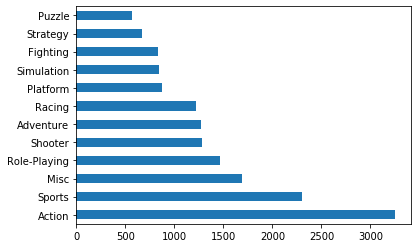

In [19]:
df["Genre"].value_counts().plot.barh()

### Publisher

In [20]:
publisher_count = pd.DataFrame(df['Publisher'].value_counts())
publisher_percent = pd.DataFrame(df['Publisher'].value_counts(normalize = True))
publisher_df = publisher_count.merge(publisher_percent, left_index = True, right_index = True)
publisher_df['Publisher'] = publisher_df.index
publisher_df.columns = ['Count', 'Percent','Publisher']
publisher_df = publisher_df.reset_index().drop('index', axis = 1)
publisher_df.head(10)

Count   Percent                     Publisher
0   1339  0.082193               Electronic Arts
1    966  0.059297                    Activision
2    928  0.056964            Namco Bandai Games
3    918  0.056350                       Ubisoft
4    823  0.050519  Konami Digital Entertainment
5    712  0.043705                           THQ
6    696  0.042723                      Nintendo
7    682  0.041864   Sony Computer Entertainment
8    632  0.038794                          Sega
9    412  0.025290          Take-Two Interactive

- As shown above, Electronic Arts has published majority of the games in this dataset; therefore, we will mainly focus on **Electronic Arts** Sales. 

#### Electronic Arts North America Sales by Genres

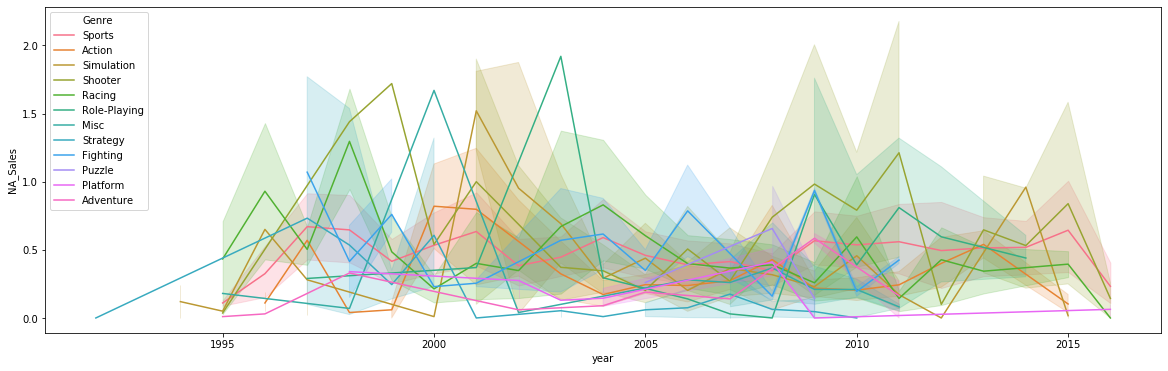

In [21]:
ea_na = df[(df["Publisher"] == "Electronic Arts")]
plt.figure(figsize=(20, 6))
sns.lineplot(data=ea_na, x="year", y="NA_Sales", hue="Genre")

#### Electronic Arts Sales in Europe (in millions) by Genres

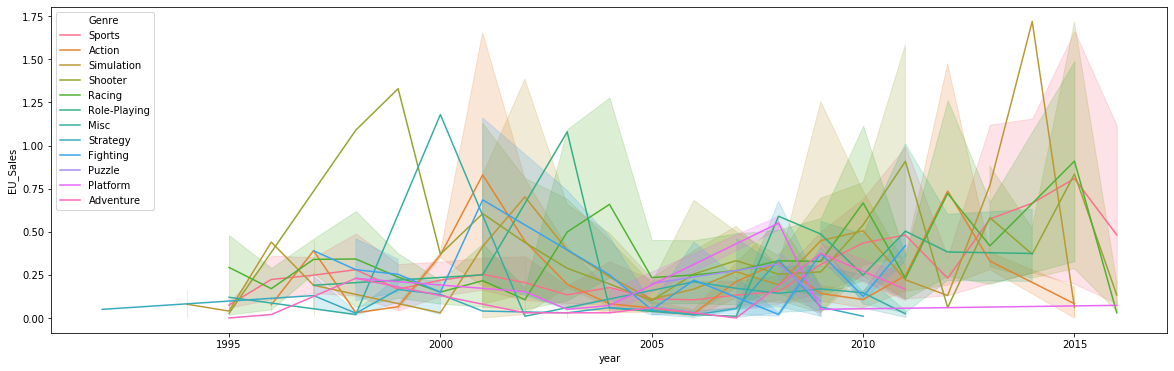

In [22]:
ea_eu = df[(df["Publisher"] == "Electronic Arts")]
plt.figure(figsize=(20, 6))
sns.lineplot(data=ea_eu, x="year", y="EU_Sales", hue="Genre")

#### Electronic Arts Sales in Japan (in millions) by Genres

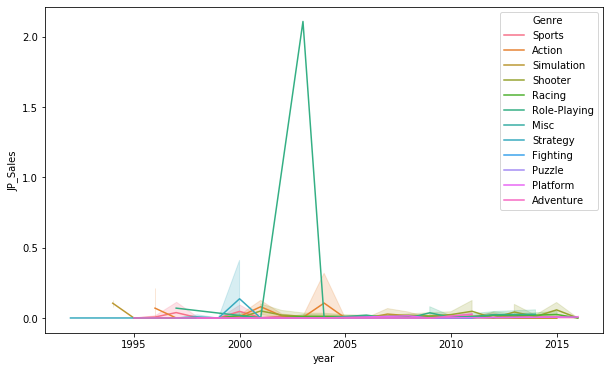

In [23]:
ea_na = df[(df["Publisher"] == "Electronic Arts")]
plt.figure(figsize=(10, 6))
sns.lineplot(data=ea_na, x="year", y="JP_Sales", hue="Genre")

#### Electronic Arts Sales in the rest of the world (in millions)by Genres

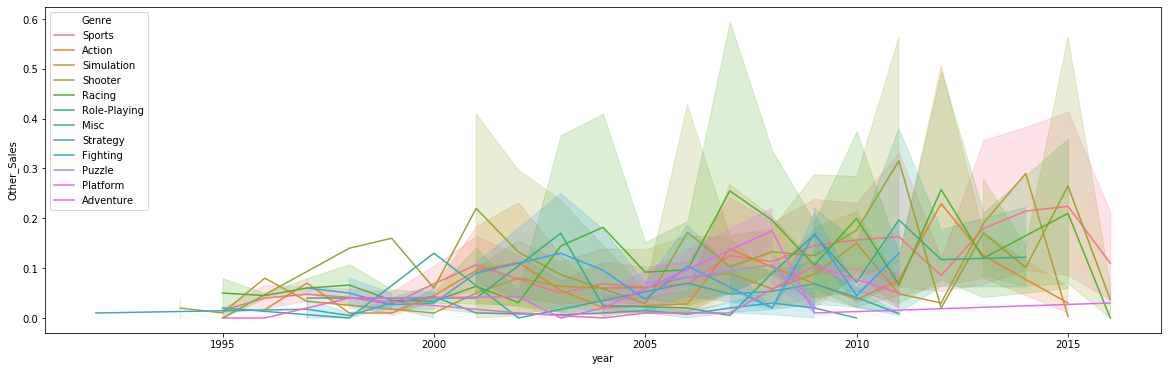

In [24]:
ea_rest = df[(df["Publisher"] == "Electronic Arts")]
plt.figure(figsize=(20, 6))
sns.lineplot(data=ea_rest, x="year", y="Other_Sales", hue="Genre")

#### Electronic Arts Sales in Total worldwide sales.by Genres

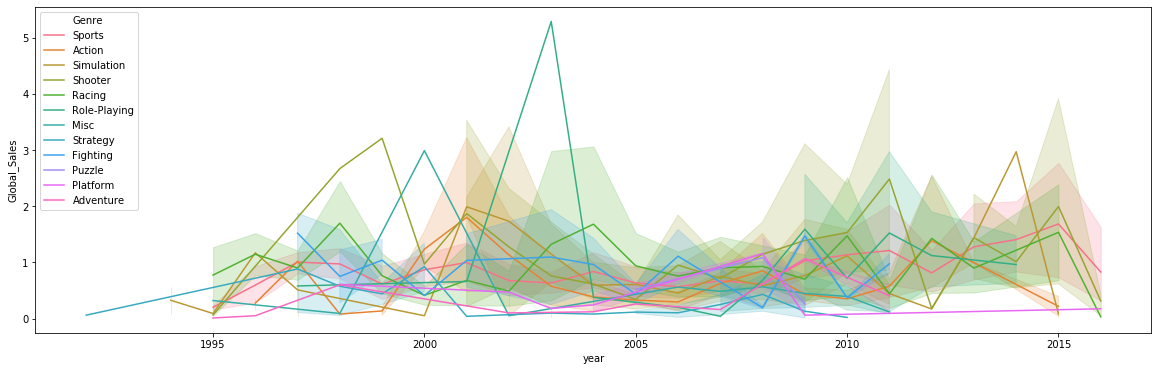

In [25]:
ea_global = df[(df["Publisher"] == "Electronic Arts")]
plt.figure(figsize=(20, 6))
sns.lineplot(data=ea_global, x="year", y="Global_Sales", hue="Genre")

### Platform

In [26]:
platform_count = pd.DataFrame(df['Platform'].value_counts())
platform_percent = pd.DataFrame(df['Platform'].value_counts(normalize = True))
platform_df = platform_count.merge(platform_percent, left_index = True, right_index = True)
platform_df['Platform'] = platform_df.index
platform_df.columns = ['Count', 'Percent','Platform']
platform_df = platform_df.reset_index().drop('index', axis = 1)
platform_df.head(10)

Count   Percent Platform
0   2131  0.130808       DS
1   2127  0.130563      PS2
2   1304  0.080044      PS3
3   1290  0.079185      Wii
4   1234  0.075747     X360
5   1197  0.073476      PSP
6   1189  0.072985       PS
7    938  0.057578       PC
8    803  0.049291       XB
9    786  0.048247      GBA

In [27]:
df_EA = df[(df["Publisher"] == "Electronic Arts")]

In [28]:
xaction=df_EA[df_EA.Genre=="Action"]
xsports=df_EA[df_EA.Genre=="Sports"]
xmisc=df_EA[df_EA.Genre=="Misc"]
xrole=df_EA[df_EA.Genre=="Role-Playing"]
xshooter=df_EA[df_EA.Genre=="Shooter"]
xadventure=df_EA[df_EA.Genre=="Adventure"]
xrace=df_EA[df_EA.Genre=="Racing"]
xplatform=df_EA[df_EA.Genre=="Platform"]
xsimulation=df_EA[df_EA.Genre=="Simulation"]
xfight=df_EA[df_EA.Genre=="Fighting"]
xstrategy=df_EA[df_EA.Genre=="Strategy"]
xpuzzle=df_EA[df_EA.Genre=="Puzzle"]

In [29]:
trace1 = go.Histogram(
    x=xaction.Platform,
    opacity=0.75,
    name = "Action",
    marker=dict(color='rgb(165,0,38)'))
trace2 = go.Histogram(
    x=xsports.Platform,
    opacity=0.75,
    name = "Sports",
    marker=dict(color='rgb(215,48,39)'))
trace3 = go.Histogram(
    x=xmisc.Platform,
    opacity=0.75,
    name = "Misc",
    marker=dict(color='rgb(244,109,67)'))
trace4 = go.Histogram(
    x=xrole.Platform,
    opacity=0.75,
    name = "Role Playing",
    marker=dict(color='rgb(253,174,97)'))
trace5 = go.Histogram(
    x=xshooter.Platform,
    opacity=0.75,
    name = "Shooter",
    marker=dict(color='rgb(254,224,144)'))
trace6 = go.Histogram(
    x=xadventure.Platform,
    opacity=0.75,
    name = "Adventure",
    marker=dict(color='rgb(170,253,87)'))
trace7 = go.Histogram(
    x=xrace.Platform,
    opacity=0.75,
    name = "Racing",
    marker=dict(color='rgb(171,217,233)'))
trace8 = go.Histogram(
    x=xplatform.Platform,
    opacity=0.75,
    name = "Platform",
    marker=dict(color='rgb(116,173,209)'))
trace9 = go.Histogram(
    x=xsimulation.Platform,
    opacity=0.75,
    name = "Simulation",
    marker=dict(color='rgb(69,117,180)'))
trace10 = go.Histogram(
    x=xfight.Platform,
    opacity=0.75,
    name = "Fighting",
    marker=dict(color='rgb(49,54,149)'))
trace11 = go.Histogram(
    x=xstrategy.Platform,
    opacity=0.75,
    name = "Strategy",
    marker=dict(color="rgb(10,77,131)"))
trace12 = go.Histogram(
    x=xpuzzle.Platform,
    opacity=0.75,
    name = "Puzzle",
    marker=dict(color='rgb(1,15,139)'))

trace = [trace1, trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9,trace10,trace11,trace12]
layout = go.Layout(barmode='stack',
                   title='Electronic Arts Genre Counts According to Platform',
                   xaxis=dict(title='Platform'),
                   yaxis=dict( title='Count'),
                   paper_bgcolor='beige',
                   plot_bgcolor='beige'
)
fig = go.Figure(data=trace, layout=layout)
iplot(fig)

- As shown from above graph, we see that **Electronic Arts** has made a number of sports games in **Playstation** and **XBOX** platform.

**Now let's check the yearly global sales of Electronic Arts by Genres using heatmap**

In [30]:
pivot = df_EA.pivot_table(index="Genre", 
                          values="Global_Sales", 
                          columns="year", 
                          aggfunc="sum")
print(pivot)

year          1992  1994  1995  1996   1997   1998  1999   2000   2001   2002  \
Genre                                                                           
Action         NaN   NaN   NaN  0.82   1.02   0.08  0.27   2.47   7.21  14.73   
Adventure      NaN   NaN  0.01  0.05    NaN   0.60   NaN    NaN    NaN   0.20   
Fighting       NaN   NaN   NaN   NaN   1.52   1.50  3.12   0.41   2.07    NaN   
Misc           NaN   NaN  0.32   NaN    NaN   0.09   NaN   2.99    NaN   0.05   
Platform       NaN   NaN   NaN   NaN    NaN   0.61   NaN    NaN    NaN   1.88   
Puzzle         NaN   NaN   NaN   NaN    NaN    NaN   NaN    NaN    NaN    NaN   
Racing         NaN   NaN  2.32  2.29   2.70   8.49  8.38   3.31   7.48   6.34   
Role-Playing   NaN   NaN   NaN   NaN   0.58    NaN   NaN    NaN   0.66    NaN   
Shooter        NaN   NaN  0.19   NaN    NaN   2.67  3.21   0.97   3.74  17.86   
Simulation     NaN  0.65  0.09  1.17   1.53    NaN   NaN   0.05   3.98   6.93   
Sports         NaN   NaN  0.

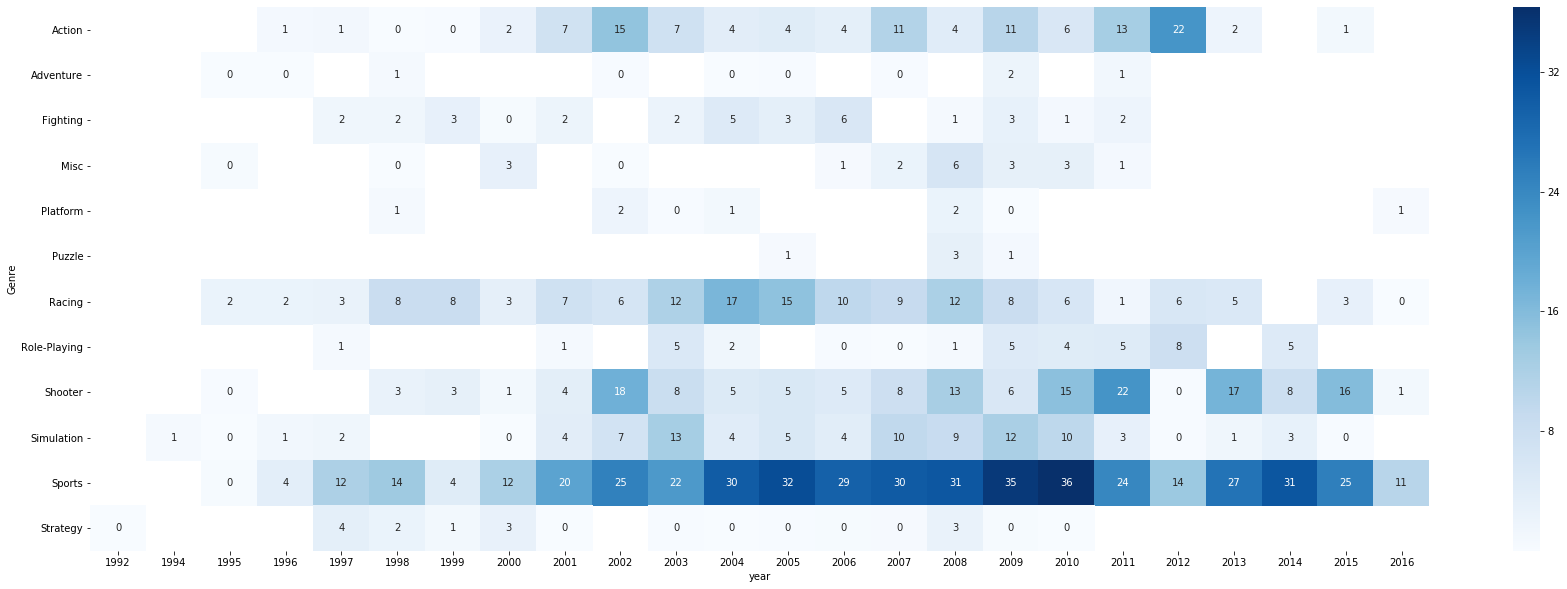

In [31]:
plt.figure(figsize=(30,10))
sns.heatmap(pivot, cmap="Blues", annot=True, fmt=".0f")

- As expected, Sports has the most global sales especially from **2004 to 2010**. 

**Now Let's check their most renowned game FIFA by Platform**

In [32]:
df_fifa = df[df['Name'].str.match('FIFA')]

In [33]:
df_fifa['Name'].unique()

array(['FIFA 16', 'FIFA Soccer 13', 'FIFA 14', 'FIFA 12', 'FIFA 15',
       'FIFA Soccer 11', 'FIFA 17', 'FIFA Soccer 06', 'FIFA Soccer 07',
       'FIFA Soccer 2005', 'FIFA Soccer 10', 'FIFA Soccer 2003',
       'FIFA Soccer 08', 'FIFA Soccer 09', 'FIFA 2000', 'FIFA Street',
       'FIFA Soccer 09 All-Play', 'FIFA Soccer World Championship',
       'FIFA Soccer 2004', 'FIFA: Road to World Cup 98',
       'FIFA Soccer 2002', 'FIFA Soccer', 'FIFA: Road to  World Cup 98',
       'FIFA World Cup Germany 2006', 'FIFA 99', 'FIFA Soccer 64',
       'FIFA Street 2', 'FIFA Street 3', 'FIFA 2001 Major League Soccer',
       'FIFA Soccer 96', 'FIFA Soccer 97',
       'FIFA 06: Road to FIFA World Cup', 'FIFA 06 Soccer',
       'FIFA 2001: Major League Soccer', 'FIFA Manager 12',
       'FIFA Soccer 2003 (weekly jp sales)',
       'FIFA World Cup: Germany 2006'], dtype=object)

In [34]:
pivot_fifa = df_fifa.pivot_table(index="Platform", 
                          values="Global_Sales", 
                          columns="Name", 
                          aggfunc="sum")

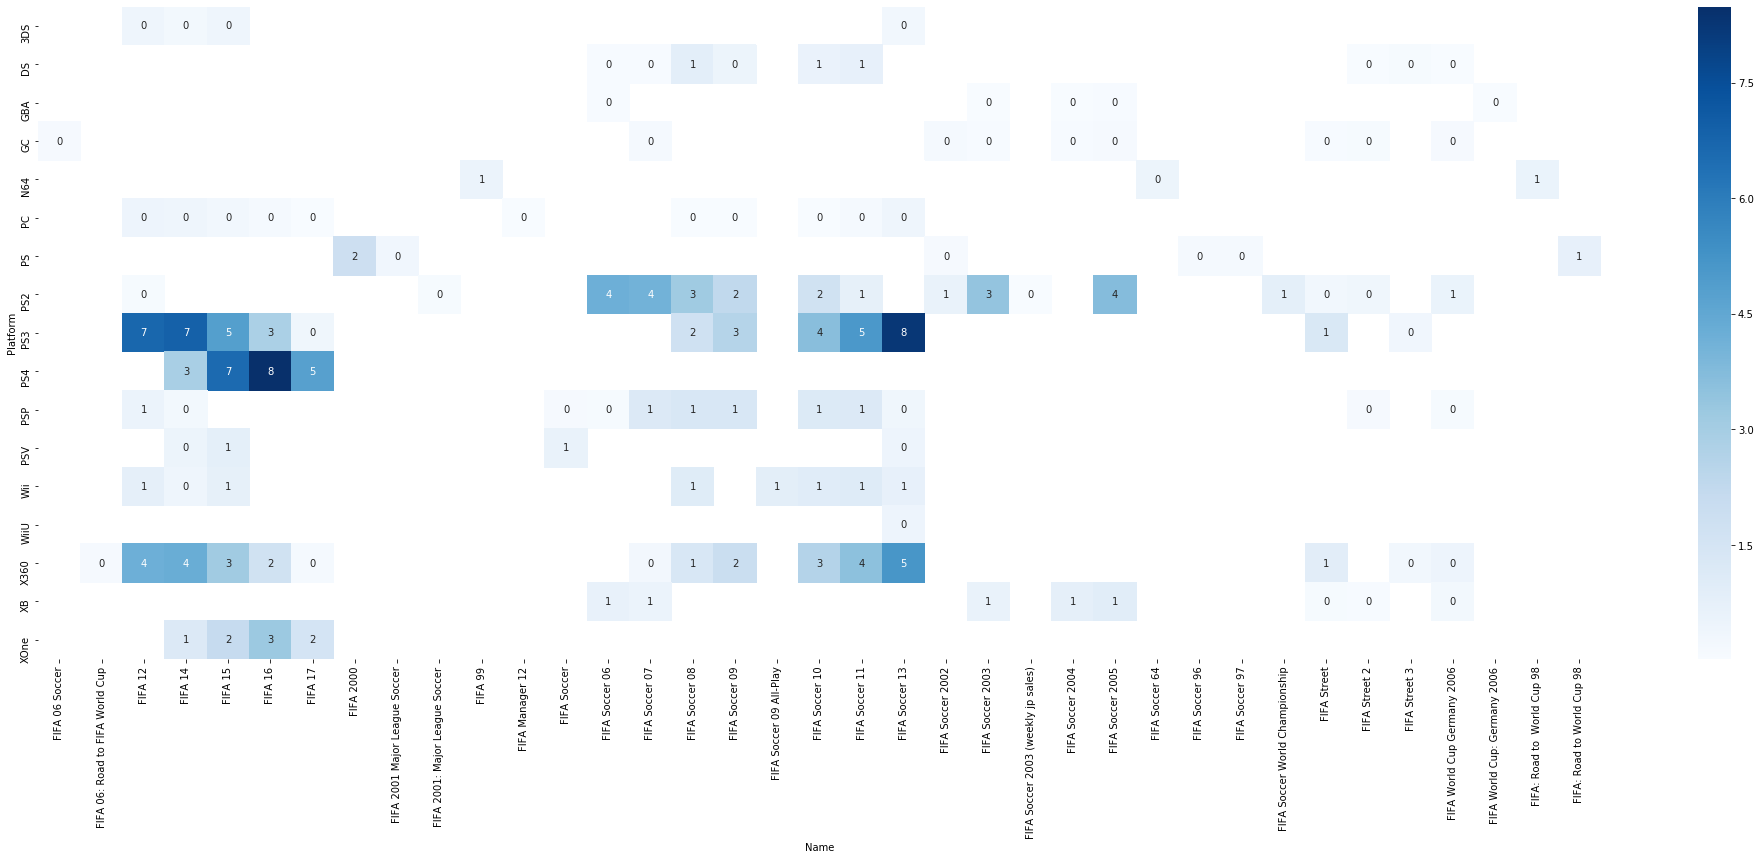

In [35]:
plt.figure(figsize=(35,12))
sns.heatmap(pivot_fifa, cmap="Blues", annot=True, fmt=".0f")

- As shown above, **FIFA12, FIFA 13**, and **FIFA14** are really popular in **PS3** platform and **FIFA15** and **FIFA16** are really popular in **PS4** platform.  

**Let's check the time series plot of FIFA Global Sales**

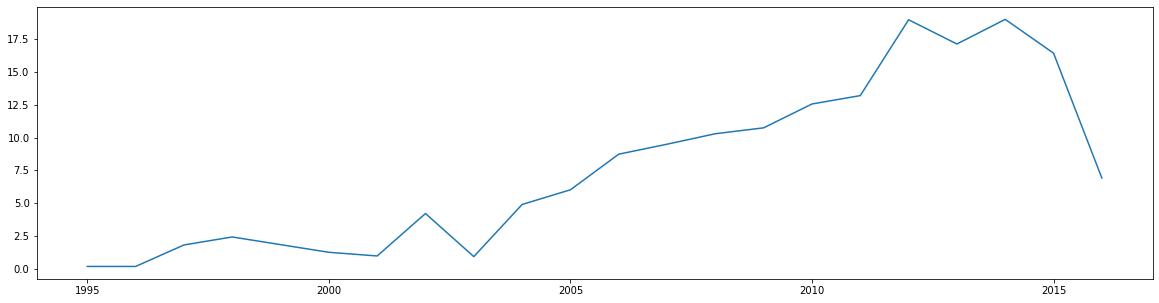

In [36]:
fifa_global_sales_yearly = df_fifa.groupby(by=['year'], as_index=False)['Global_Sales'].sum()
plt.figure(figsize=(20,5))
plt.plot(fifa_global_sales_yearly.year, fifa_global_sales_yearly.Global_Sales)
plt.show()

## Predictive Analysis

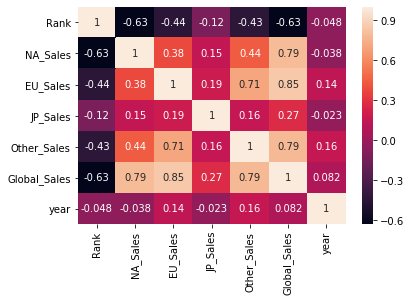

In [37]:
# Checking Correlation
# df_EA = df[(df["Publisher"] == "Electronic Arts")]
sns.heatmap(df_EA.corr(),cbar=True,annot=True)

In [38]:
#df_EA.head()

### Decision Tree Regression

In [39]:
features = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']#our features
X = df_EA[features]
y = df_EA.Global_Sales #target
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [40]:
DTmodel = DecisionTreeRegressor(random_state=1)
DTmodel.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [41]:
predictions = DTmodel.predict(X_test)

In [42]:
mae = mean_absolute_error(predictions, y_test)
mse = mean_squared_error(predictions, y_test)
print('Mean Absolute Error: '+str(mae))
print('Mean Squared Error: '+str(mse))

Mean Absolute Error: 0.08415742714996445
Mean Squared Error: 0.06431646206890716


In [43]:
pred_EA_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
pred_EA_df.head()

Actual  Predicted
3405     0.59       0.43
13985    0.04       0.04
8000     0.18       0.19
2821     0.72       0.70
5388     0.34       0.40

In [44]:
score = DTmodel.score(X_test, y_test)

In [45]:
score

0.9415714890192932

### Random Forest Regression

In [46]:
features = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']#our features
X = df_EA[features]
y = df_EA.Global_Sales #target
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [47]:
RFmodel = RandomForestRegressor(n_estimators=10, random_state = 0)
RFmodel.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [48]:
predictions = RFmodel.predict(X_test)

In [49]:
mae = mean_absolute_error(predictions, y_test)
mse = mean_squared_error(predictions, y_test)
print('Mean Absolute Error: '+str(mae))
print('Mean Squared Error: '+str(mse))

Mean Absolute Error: 0.04788014236178416
Mean Squared Error: 0.027209754516189386


In [50]:
pred_EA_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
pred_EA_df.head()

Actual  Predicted
3405     0.59   0.532933
13985    0.04   0.046000
8000     0.18   0.172000
2821     0.72   0.738500
5388     0.34   0.357250

In [51]:
score = RFmodel.score(X_test, y_test)
score

0.9752812050073866

### Ridge Regression

In [57]:
from sklearn.preprocessing import LabelEncoder
categorical_labels = ['Platform', 'Genre']
numerical_lables = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
LE = LabelEncoder()
encoded = pd.DataFrame(columns=['Platform', 'Genre', 'Global_Sales'])

for label in categorical_labels:
    temp_column = df_EA[label]

    encoded_temp_col = LE.fit_transform(temp_column)

    encoded[label] = encoded_temp_col

for label in numerical_lables:
    encoded[label] = df_EA[label].values

encoded.head()

Platform  Genre  Global_Sales  NA_Sales  EU_Sales  JP_Sales  Other_Sales
0        10     10          8.49      1.11      6.06      0.06         1.26
1         9      0          8.24      1.06      5.05      0.13         2.01
2         6      9          8.11      0.98      6.42      0.00         0.71
3        10      8          7.67      2.93      3.29      0.22         1.23
4        16      8          7.34      4.46      2.13      0.06         0.69

In [58]:
X = encoded[['Platform', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
y = encoded['Global_Sales']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [60]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridgeModel = ridge.fit(X_train, y_train)
predictions = ridgeModel.predict(X_test)

In [63]:
mae = mean_absolute_error(predictions, y_test)
mse = mean_squared_error(predictions, y_test)
print('Mean Absolute Error: '+str(mae))
print('Mean Squared Error: '+str(mse))

Mean Absolute Error: 0.00979808797224073
Mean Squared Error: 0.0014671122961968216


In [64]:
pred_EA_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
pred_EA_df.head()

Actual  Predicted
559     0.59   0.552176
1286    0.04   0.042531
1021    0.18   0.181780
460     0.72   0.723311
802     0.34   0.342874

In [65]:
score = ridgeModel.score(X_test, y_test)
score

0.9986671967930011